# Synthetic spectral synthesis

We are going to make fake data to understand how stellar specrtra work.

In [1]:
import numpy as np
#import jax.numpy as np  ## Next step

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The data exist as a table of wavelength, flux, and flux uncertainty.  
You can think of the wavelength values as corresponding to the near-IR in micron.

In [3]:
wl = np.linspace(2.0, 2.4, 100)

The specrral lines will all be absorption lines with Gaussian line profiles:
$$ $$
$$\mathrm{abs}(\lambda) = A \cdot e^{-\frac{1}{2}\left((\lambda-\lambda_0)/\sigma\right)^2 }$$

The free paramters for the line are the line center position $\lambda_0$, depth $A$, and linewidth $\sigma$.

In [4]:
def line_profile(location, depth, width):
    """Make a spectral line"""
    return depth * np.exp(-0.5*((wl-location)/width)**2)

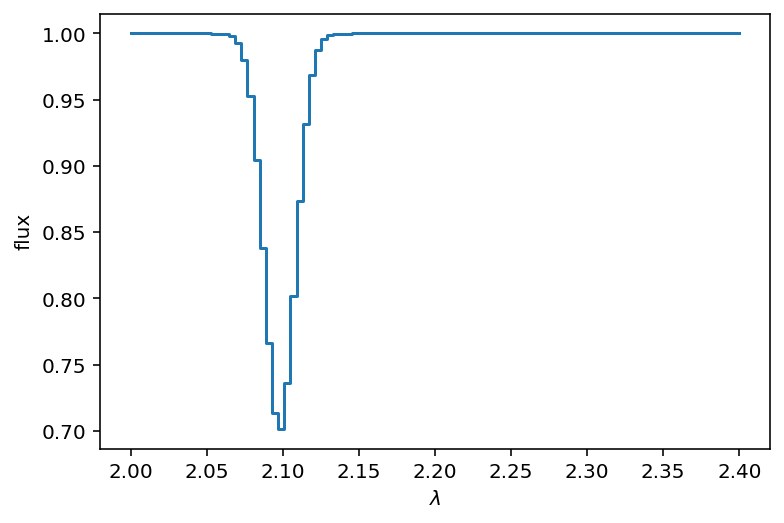

In [5]:
plt.step(wl, 1-line_profile(2.1, 0.3, 0.01))
plt.xlabel('$\lambda$'); plt.ylabel('flux');

We're going to make a function that generates fake flux values.
This spectrum has 3 distinct lines:  
- $\lambda=2.1$ the amplitude depends only on $T_{\mathrm{eff}}$
- $\lambda=2.2$ the linewidth depends only on $\log{g}$
- $\lambda=2.3$ increases linearly with $[\mathrm{Fe}/\mathrm{H}]$

In [6]:
def synthetic_spectrum(teff, logg, fe_h):
    """generate a synthetic spectrum"""
    amp1 = 0.6*np.exp(-((teff-2700)/500)**2)
    line1 = line_profile(2.1, amp1, 0.01)
    
    width2 = 0.01 + 0.002*(0.5+np.arctan( ((logg - 3)/0.5) / (np.pi/4) ))
    line2 = line_profile(2.2, 0.3, width2)
    
    amp3 = 0.0 + 0.1*np.sqrt(6+fe_h)
    line3 = line_profile(2.3, amp3, 0.01)
    
    net_flux = 1 - (line1 + line2 + line3)
    return net_flux

In [7]:
flux = synthetic_spectrum(2700, 3.5, 0.0)

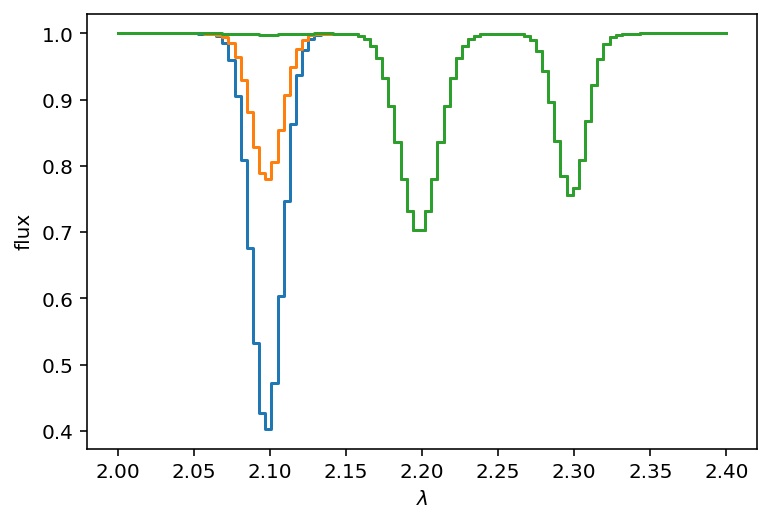

In [8]:
plt.step(wl, flux);
plt.step(wl, synthetic_spectrum(2200, 3.5, 0.0))
plt.step(wl, synthetic_spectrum(3900, 3.5, 0.0))
plt.xlabel('$\lambda$'); plt.ylabel('flux');

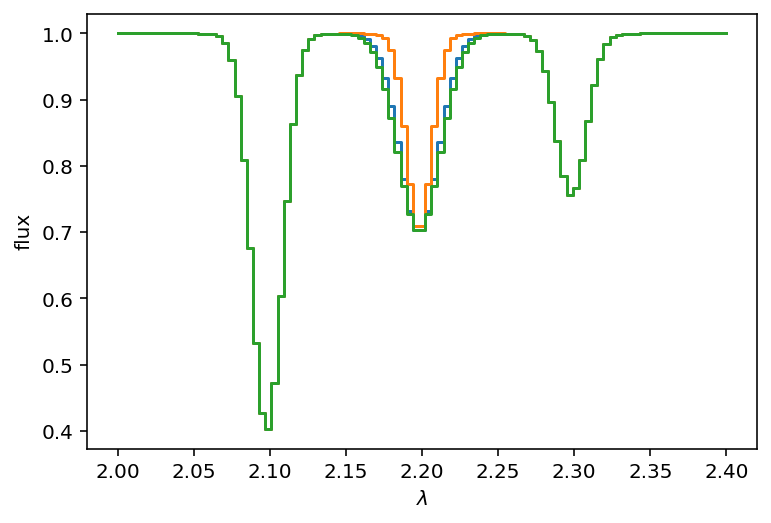

In [9]:
plt.step(wl, flux);
plt.step(wl, synthetic_spectrum(2700, 0.5, 0.0))
plt.step(wl, synthetic_spectrum(2700, 6.0, 0.0))
plt.xlabel('$\lambda$'); plt.ylabel('flux');

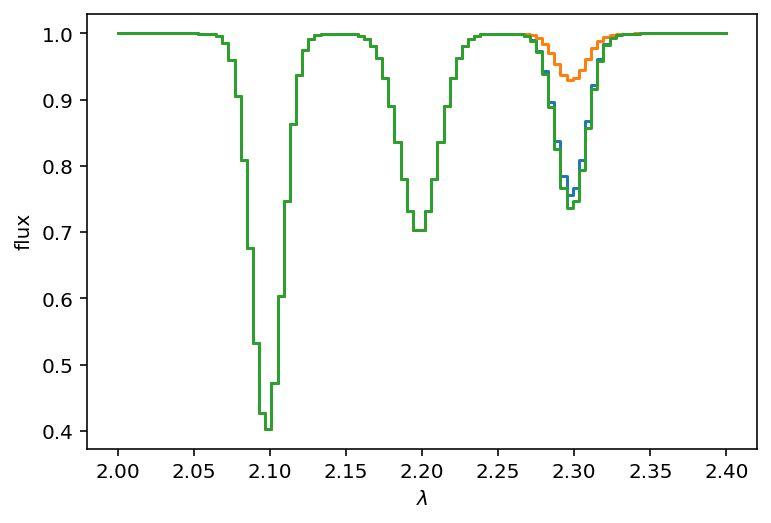

In [10]:
plt.step(wl, flux);
plt.step(wl, synthetic_spectrum(2700, 3.5, -5.5))
plt.step(wl, synthetic_spectrum(2700, 3.5, 1.0))
plt.xlabel('$\lambda$'); plt.ylabel('flux');

Next step: use jax to get: 
$$ \frac{\partial f(\lambda)}{\partial T_{\mathrm{eff} }}, \frac{\partial f(\lambda)}{\partial \log{g}}, \frac{\partial f(\lambda)}{\partial [\mathrm{Fe}/\mathrm{H}]}$$

To be continued at the Ames Hack Day!